<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 55px"> 

# Project 2: Ames Housing Data and Kaggle Challenge

## Problem Statement:
The year is 2011. As a member of the data team at an established real estate company located in Ames you have been tasked with creating a regression model that is able to predict property prices. This predictive model should serve the property agents in your company well by allowing them to provide fair valuations to clients as well as identify houses that can net them more commissions. However, these valuations are worthless if inaccurate, so there is an accuracy requirement of R2 > 0.75.

As part of the process, you are also required to give some insights regarding factors that influence the selling price of a house as well as make recommendations based on these. 

## Background:
With a population of around 60,000, Ames is the 9th biggest city in Iowa. It has a humid, continental climate, complete with four seasons. Summers are hot (up to 74 degrees Fahrenheit in July), and winters are cold (down to 20.4 degrees Fahrenheit in Jan). Households in Ames own 2 cars on average. 

source: [Data USA](https://datausa.io/profile/geo/ames-ia/)

### Contents:
- [Datasets](#Datasets)
- [Data Import](#Import-and-Examine-the-Data)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Feature Engineering](#Feature-Engineering)
- [Feature Selection](#Feature-Selection)

## Datasets

Two datasets,`train` and `test`, are obtained from the Ames Assessor's Office and provided for analysis and modelling. Both datasets are a record of sales for residential properties sold in Ames, Iowa from 2006 to 2010.

`train` contains observations/assessments of features and the selling price of the respective sold house. This dataset contains values of the target variable (saleprice) and will hence be used for model creation. 

`test` contains only the features without sale price and will thus be used for prediction and final evaluation.

### Data Dictionary
A **data dictionary** has been kindly provided at http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set max rows and columns display
pd.set_option("display.max_columns", None)

In [3]:
# scatterplot function used to visualize saleprice vs continuous variables
def plot_scatterplot(feature, title):
    sns.lmplot(x=feature,
               y='saleprice',
               data=ames_housing,
               ci=None,
               palette=None,
               height=7,
               aspect=1.8)
    title = plt.title(title, size=20)

In [4]:
# boxplot function used to visualize categorical/ordinal variables in relation to saleprice
def plot_boxplot(feature):
    order = ames_housing.groupby(
        [feature]).median().saleprice.sort_values(ascending=True).index

    # Create box plot
    sns.boxplot(x=feature,
                y='saleprice',
                data=ames_housing,
                order=order,
                palette=None)

## Import and Examine the Data

In [5]:
ames_housing = pd.read_csv("datasets/train.csv")
ames_housing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
ames_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [7]:
# Null values
nulls = ames_housing.isnull().sum().sort_values(ascending = False)
nulls[nulls > 0]

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
dtype: int64

There are a total of 2051 observations across 80 features and 1 target which is the `Saleprice`.
A total of 26 columns contain null values which need to be filled accordingly. 

## Data Cleaning

###  Renaming Columns

In [8]:
# Renaming the columns to make them easier to work with. Replace spaces with '_' and lowercase all column names
ames_housing.columns = ames_housing.columns.str.replace(' ','_')
ames_housing.columns = ames_housing.columns.str.lower()
ames_housing.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

### Addressing Null Values

Starting with columns where a null value should indicate absence rather than a mising value. Here, we can use related columns that don't have null values to deduce and impute 0 or 'none' values. Reference to the data dictionary also shows that many variables have a 0 or 'none' type of value to show absence of feature.

In [9]:
# Do null values for pool_qc indicate a lack of a pool? no rows should have pool_area > 0 when pool_qc is None.
ames_housing[(ames_housing['pool_area'] > 0) & (ames_housing['pool_qc'] == None)]['saleprice'].count()

0

In [10]:
# Likewise for fireplace_qu and fireplaces
ames_housing[(ames_housing['fireplaces'] > 0) & (ames_housing['fireplace_qu'] == None)]['saleprice'].count()

0

In [11]:
# And also misc_val and misc_feature
ames_housing[(ames_housing['misc_val'] > 0) & (ames_housing['misc_feature'] == None)]['saleprice'].count()

0

The 3 quick checks came out well, so we'll go ahead with the imputation.

In [12]:
# check if null values in mas_vnr_type match those in mas_vnr_area
ames_housing[(ames_housing['mas_vnr_type'].isnull()) & (ames_housing['mas_vnr_area'].isnull())]['saleprice'].count()

22

In [13]:
# they match, so likely indicative of absence. mas_vnr_type change null to 'None'
ames_housing['mas_vnr_type'].fillna('None', inplace = True)

# mas_vnr_area change null to 0
ames_housing['mas_vnr_area'].fillna(0, inplace = True)

In [14]:
# replacing null values of Misc Feature with category 'none'
ames_housing['misc_feature'].fillna('none', inplace = True)

In [15]:
# replace null values of alley with category 'none'
ames_housing['alley'].fillna('none', inplace = True)

#### Features on a Scale
Ordinal variables may be converted into a scale, depending on the range of possible scores. The most prevalent form is a 6 point scale that 9 variables share. (NA, Poor, Fair, Typical, Good, Excellent)

Another scale that runs from 1-10 is used by variables overall_qual and overall_cond. The remaining ordinal variables each follow their own respective scales.

Converting these ordinal variables into numerical scales will also address many of the null values by imputing 0 to indicate absence of that feature.

In [16]:
# function that takes in scale, dataframe, and list of column names for conversion
def ordinal_conversion(df, columns, scale):
    for col in columns:
        df[col] = df[col].map(scale) 
        # Replace null values with 0, based on deductive imputation
        df[col] = df[col].fillna(0) 

In [17]:
# Start with most common six point scale
six_scale = {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

columns = ['exter_qual', 
           'exter_cond',
           'bsmt_qual',
           'bsmt_cond',
           'heating_qc',
           'kitchen_qual',
           'fireplace_qu',
           'garage_qual',
           'garage_cond']

ordinal_conversion(ames_housing, columns, six_scale)

In [18]:
# Applying the function to variables on other scales

pool_scale = {'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}
ordinal_conversion(ames_housing, ['pool_qc'], pool_scale)

fence_scale = {'NA':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}
ordinal_conversion(ames_housing, ['fence'], fence_scale)

slope_scale = {'Sev':0, 'Mod':1, 'Gtl':2}
ordinal_conversion(ames_housing, ['land_slope'], slope_scale)

paveddrive_scale = {'N':0, 'P':1, 'Y':2}
ordinal_conversion(ames_housing, ['paved_drive'], paveddrive_scale)

lot_scale = {'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0}
ordinal_conversion(ames_housing, ['lot_shape'], lot_scale)

utilities_scale = {'ELO':3, 'NoSeWa':2, 'NoSewr':1, 'AllPub':0}
ordinal_conversion(ames_housing, ['utilities'], utilities_scale)

electrical_scale = {'Mix':0, 'FuseP':1, 'FuseF':2, 'FuseA':3, 'Sbrkr':4}
ordinal_conversion(ames_housing, ['electrical'], electrical_scale)

functional_scale = {'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}
ordinal_conversion(ames_housing, ['functional'], functional_scale)

bsmtexposure_scale = {'NA':0, 'No':1, 'Mn':3, 'Av':3, 'Gd':4}
ordinal_conversion(ames_housing, ['bsmt_exposure'], bsmtexposure_scale)

bsmtfin_scale = {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
ordinal_conversion(ames_housing, ['bsmtfin_type_2', 'bsmtfin_type_1'], bsmtfin_scale)

In [19]:
# Null values
nulls = ames_housing.isnull().sum().sort_values(ascending = False)
nulls[nulls > 0]

lot_frontage      330
garage_finish     114
garage_yr_blt     114
garage_type       113
bsmt_full_bath      2
bsmt_half_bath      2
bsmt_unf_sf         1
bsmtfin_sf_2        1
bsmtfin_sf_1        1
garage_cars         1
total_bsmt_sf       1
garage_area         1
dtype: int64

#### Lot Frontage
There are 330 missing values for the feature lot_frontage that appear to be missing at random. Missing values will initially be replaced with a measure of central tendency for simplicity.

In [20]:
# replace missing lot_frontage values with the median value
ames_housing["lot_frontage"].fillna(ames_housing["lot_frontage"].median(), inplace=True)

#### Basement Features

In [21]:
ames_housing[ames_housing["total_bsmt_sf"].isna()].loc[:, ames_housing.columns.str.contains("bsmt")]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
1327,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [22]:
# row index 1327 is a problematic row with missing basement variables.
# There is no basement for this observation, so the missing numerical variables can all be filled with 0
ames_housing.iloc[1327] = ames_housing.iloc[1327].fillna(0)

#### Garage Features
There seems to be a mismatch in the number of null values between garage_type, garage_yr_blt and garage_finish. Consider it as a case of erroneous input since garage_yr_blt and garage_finish are both absent. If there is no garage, then garage_type should be replaced with an absence value as well. 

In [23]:
ames_housing[ames_housing["garage_area"].isna()].loc[:, ames_housing.columns.str.contains("garage")]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond
1712,Detchd,NaN,NaN,NaN,NaN,0.0,0.0


In [24]:
# garage_type change to null for the row that has null value for garage_yr_blt and garage_finish
ames_housing.loc[ames_housing.index[1712], 'garage_type'] = None

# change garage_type null values into 'none'
ames_housing['garage_type'].fillna('none', inplace = True)

# change garage_yr_blt, garage_cars and garage_area null values to 0
ames_housing['garage_yr_blt'].fillna(0, inplace = True)
             
# use ordinal conversion function on garage variables
garage_scale = {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3}
ordinal_conversion(ames_housing, ['garage_finish'], garage_scale)

In [25]:
# Null values
nulls = ames_housing.isnull().sum().sort_values(ascending = False)
nulls[nulls > 0]

garage_cars       1
garage_area       1
bsmt_full_bath    1
bsmt_half_bath    1
dtype: int64

#### Final Missing Basement Variables

In [26]:
# locate the row with the final missing values
ames_housing[ames_housing["bsmt_full_bath"].isna()].loc[:, ames_housing.columns.str.contains("bsmt")]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [27]:
# fill up the bsmt_full_bath and bsmt_half_bath values with 0 since there is no basement
ames_housing.fillna(0, inplace=True)

In [28]:
null = ames_housing.isnull().sum().sort_values(ascending = False)
null[null > 0]
# no more missing values left whoohoo

Series([], dtype: int64)

In [29]:
# check shape of cleaned dataset
ames_housing.shape

(2051, 81)

### Removing Unnecessary Columns

PID and ID merely reflect the order of observation/ is an arbitrarily assined identification number. They are of no use to the analysis and will thus be dropped.

In [30]:
# Drop pid and id
ames_housing.drop(['id', 'pid'], axis=1, inplace = True)

### Convert variables to appropriate data type

mo_sold and ms_subclass should be categorical variables. 

In [31]:
# mo_sold; use the ordinal conversion function but reverse the scale
month_scale = {1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}
ordinal_conversion(ames_housing, ['mo_sold'], month_scale)

# change ms_subclass dtype to object
ames_housing['ms_subclass'] = ames_housing['ms_subclass'].astype(str)
ames_housing['ms_subclass'].dtypes

dtype('O')

In [32]:
# save cleaned file
ames_housing.to_csv('datasets/train_cleaned.csv')

## Exploratory Data Analysis
Due to the large number of features (80) available in the dataset, selection of features via filtering is a prudent way to proceed. We begin by examining which numerical features have relatively higher correlations with the target variable (saleprice).

### Correlation With Saleprice

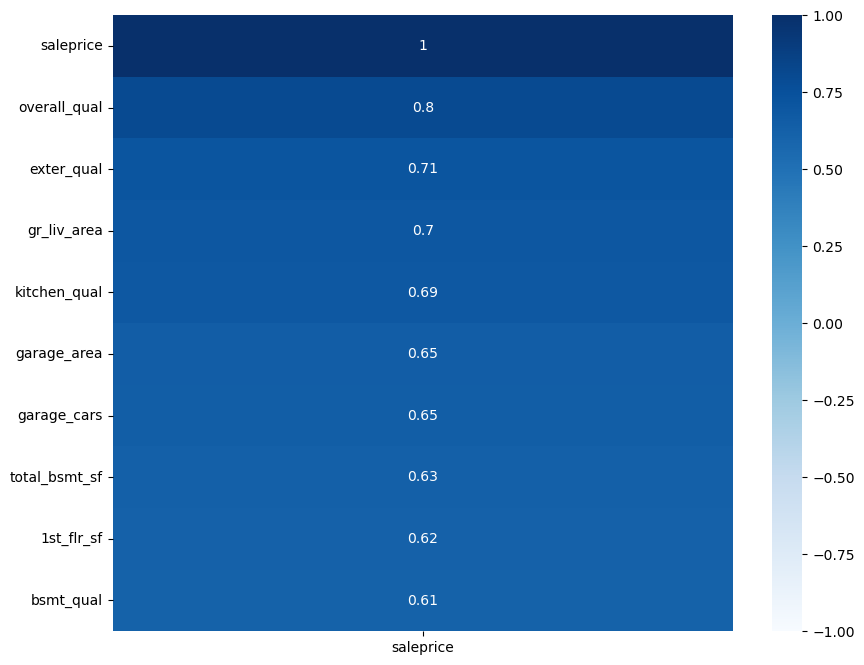

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(ames_housing.corr()[['saleprice']].sort_values('saleprice').tail(10),
            vmax=1, vmin=-1, cmap='Blues', annot=True, ax=ax);
ax.invert_yaxis()

Among numerical variables, size and quality of various aspects of the house appear to be features of interest.
On the surface, some look to be related to each other e.g. garage_area and garage_cars which are both measures of a garage's size. A heatmap of correlations between these variables should reveal any collinearities.

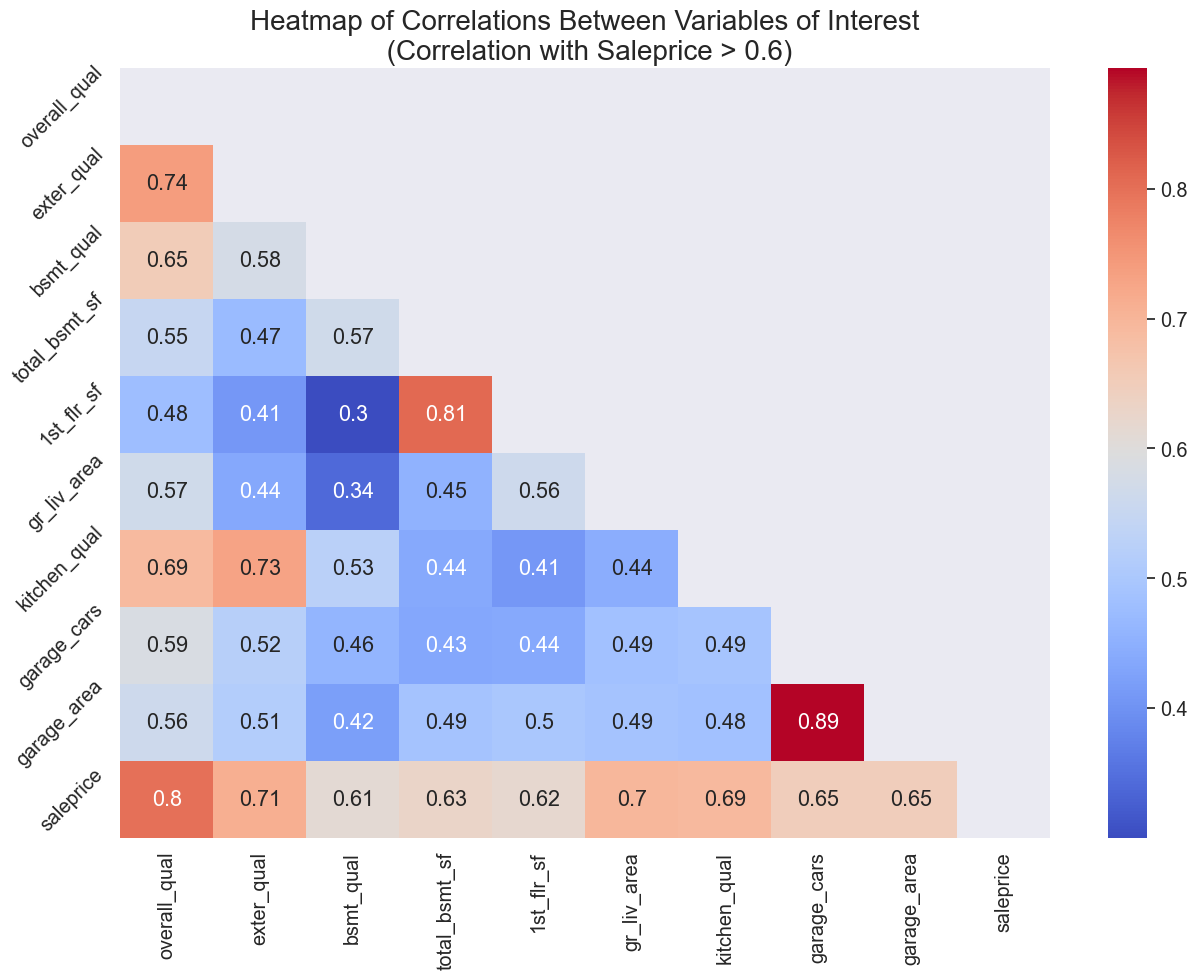

In [34]:
higher_corr = ames_housing.corr()['saleprice'][(ames_housing.corr()['saleprice'] >= 0.6) | (ames_housing.corr()['saleprice'] <= -0.6)]
higher_corr_columns = [x for x in higher_corr.index]

plt.figure(figsize=(15,10))
sns.set(font_scale=1.3)
plt.title('Heatmap of Correlations Between Variables of Interest\n (Correlation with Saleprice > 0.6)', size=20)
mask = np.triu(ames_housing[higher_corr_columns].corr())
sns.heatmap(ames_housing[higher_corr_columns].corr(), annot=True, cmap='coolwarm', mask=mask)
tick = plt.yticks(rotation=45)

Checking for multicollinearity.

Regression models assume that predictor variables are independent of one another. Selected features should as such not have high correlation with each other.

After considering the strength of correlations between variables among themselves and with sale price, the following features were selected for the linear regression model. Where two features are highly correlated, the one with a higher correlation to the target is picked. (correlation with saleprice in brackets)
* overall_qual (r = 0.8)
* gr_liv_area (r = 0.7)
* kitchen_qual (r = 0.69)
* garage_area (r = 0.65) slightly edges out garage_cars
* total_bsmt_sf (r = 0.63); 1st_flr_sf is dropped due to high correlation with total_bsmt_sf.
* bsmt_qual (r = 0.61)

### Picking Categorical Features
Categorical variables will be visualized in the form of a boxplot to seek out trends in relation to saleprice, as well as a histogram to weed out those with a large proportion of values in one category (> 80%).

In [35]:
# define list of categorical features
cat_feat = list(ames_housing.select_dtypes(include=['object']).columns)

In [36]:
# Create a function to show a boxplot and barplot for each categorical feature
def categorical_plot(dataframe, list_of_features, figsize=()):
    nrows = len(list_of_features) # 1 row per feature, 2 plots per feature
    fsize = (18, len(list_of_features) * 5.5)
    fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=fsize, sharex=False, sharey=False)
    ax = axs.ravel()
    
    for i, feature in enumerate(list_of_features):
        order = ames_housing.groupby(
        [feature]).median().saleprice.sort_values(ascending=True).index
        
        # boxplot on the left
        sns.boxplot(ax=ax[i*2],
                    data=dataframe,
                    x=feature,
                    y='saleprice',
                    orient='v',
                    linewidth=1, 
                    order=order)
                    #palette='viridis'
        
        # bar chart on the right (histplot is used for the 'stat' argument)
        if dataframe[feature].dtype == object:
            sns.histplot(data=dataframe,
                         x=feature,
                         ax=ax[(i*2 + 1)],
                         hue=feature,
                         stat='percent',
                         palette='mako',
                         legend=False,)
            axs[i,1].axhline(y = 80, alpha=0.8, color="r", linestyle="--")

        ax[i*2].set_xlabel(feature.replace('_', ' ').title(), fontsize=16)
        ax[i*2].set_ylabel('Sale Price', fontsize=16) 
        ax[i*2].tick_params(axis='x', labelrotation=45, labelsize=14)
        ax[i*2].set_title(f"Boxplot of {feature.replace('_', ' ').title()} against Sale Price", fontsize=18, fontweight='bold')
        
        ax[(i*2) + 1].set_xlabel(feature.replace('_', ' ').title(), fontsize=16)
        ax[i*2 + 1].set_ylabel('Percentage of Total Counts', fontsize=16)
        ax[i*2 + 1].tick_params(axis='x', labelrotation=45, labelsize=14)
        ax[(i*2) + 1].set_title(f"Barchart of {feature.replace('_', ' ').title()}", fontsize=18, fontweight='bold')
    fig.tight_layout()

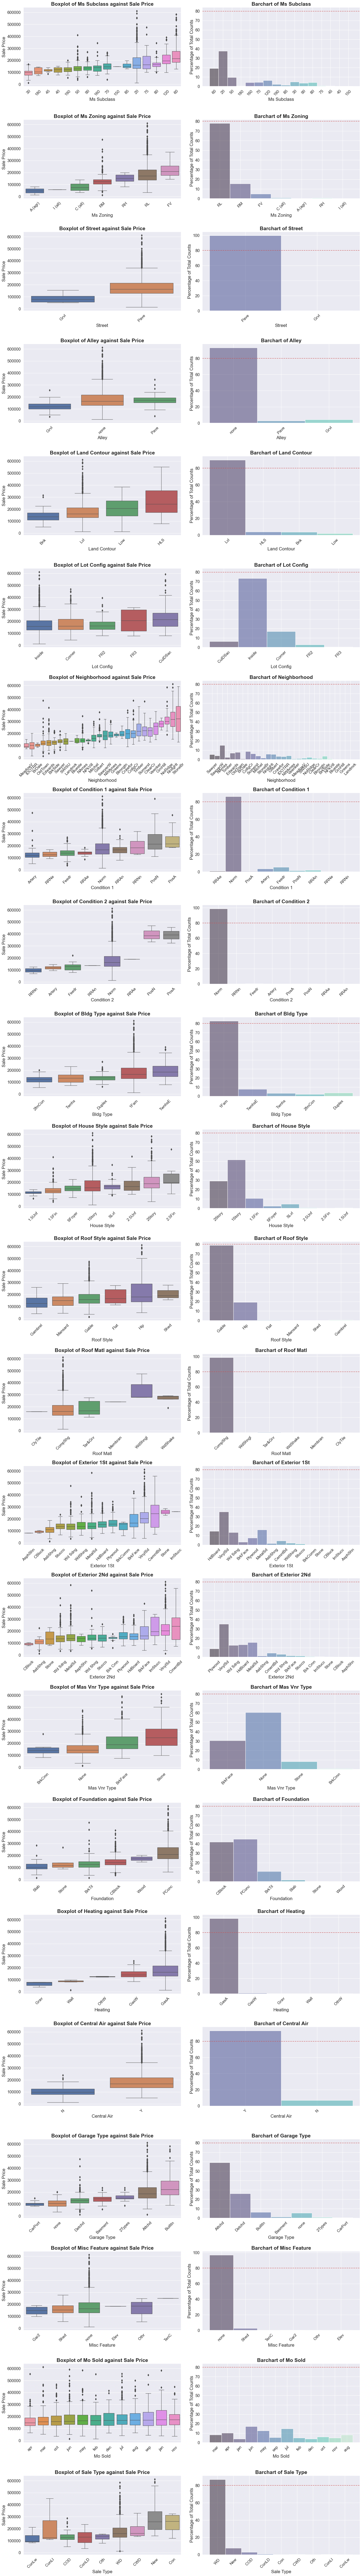

In [37]:
categorical_plot(ames_housing, cat_feat)

The following features were eliminated due to high proportion of values in one category:
* street
* alley
* land_contour
* condition_1
* condition_2
* bldg_type
* roof_matl
* heating
* central_air
* misc_feature
* sale_type

which leaves us with:
* ms_subclass
* ms_zoning
* lot_config
* neighborhood
* house_style
* roof_style
* exterior_1st
* exterior_2nd
* mas_vnr_type
* foundation
* garage_type
* mo_sold

## Feature Engineering
While the correlations for the year built feature and the bathroom count features against saleprice did not standout, these features are of considerable importance when it comes valuation. These features will be transformed or combined to create new ones that might have a larger effect.

### Total Number of Bathrooms

In [38]:
# total number of bathrooms
ames_housing['total_bathroom'] = ames_housing['full_bath'] + ames_housing['bsmt_full_bath'] + 0.5 * (ames_housing['half_bath'] + ames_housing['bsmt_half_bath'])

<AxesSubplot:title={'center':'House Sale Prices by Total Number of Bathrooms'}, xlabel='total_bathroom', ylabel='saleprice'>

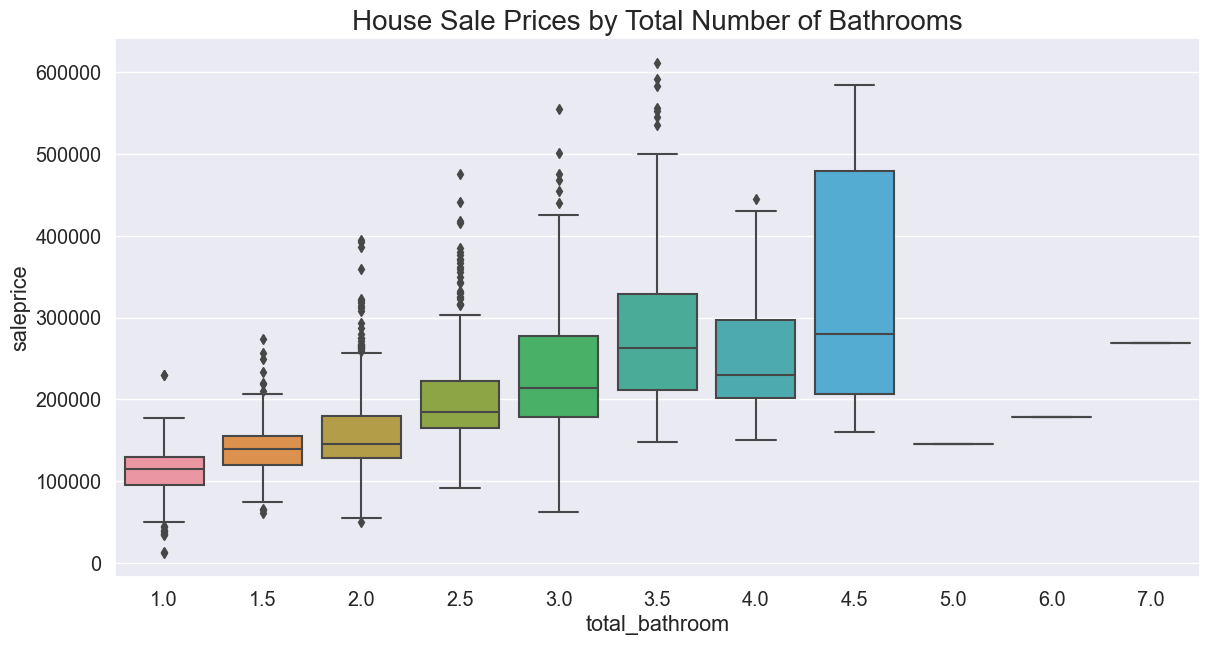

In [39]:
plt.figure(figsize=(14, 7))
title = plt.title('House Sale Prices by Total Number of Bathrooms', size=20)
sns.boxplot(x='total_bathroom',
            y='saleprice',
            data=ames_housing,
            palette=None)

In [40]:
r = np.corrcoef(ames_housing['total_bathroom'], ames_housing['saleprice'])
print(f'Correlation between total number of bathrooms and house sale price is {r[0, 1]}')

Correlation between total number of bathrooms and house sale price is 0.630206709160571


There is a positive relationship between total_bathrooms and saleprice, suggesting that houses with more bathrooms tend to sell at a higher price.

### Age of House

In [41]:
# convert year_built to house_age since it makes more sense from a interpretability perspective
ames_housing['house_age'] = ames_housing['yr_sold'] - ames_housing['year_built']

In [42]:
# check correlation with target
r = np.corrcoef(ames_housing['house_age'], ames_housing['saleprice'])
print(f'Correlation between age of house at sale and house sale price is {r[0, 1]}')

Correlation between age of house at sale and house sale price is -0.5718812481814429


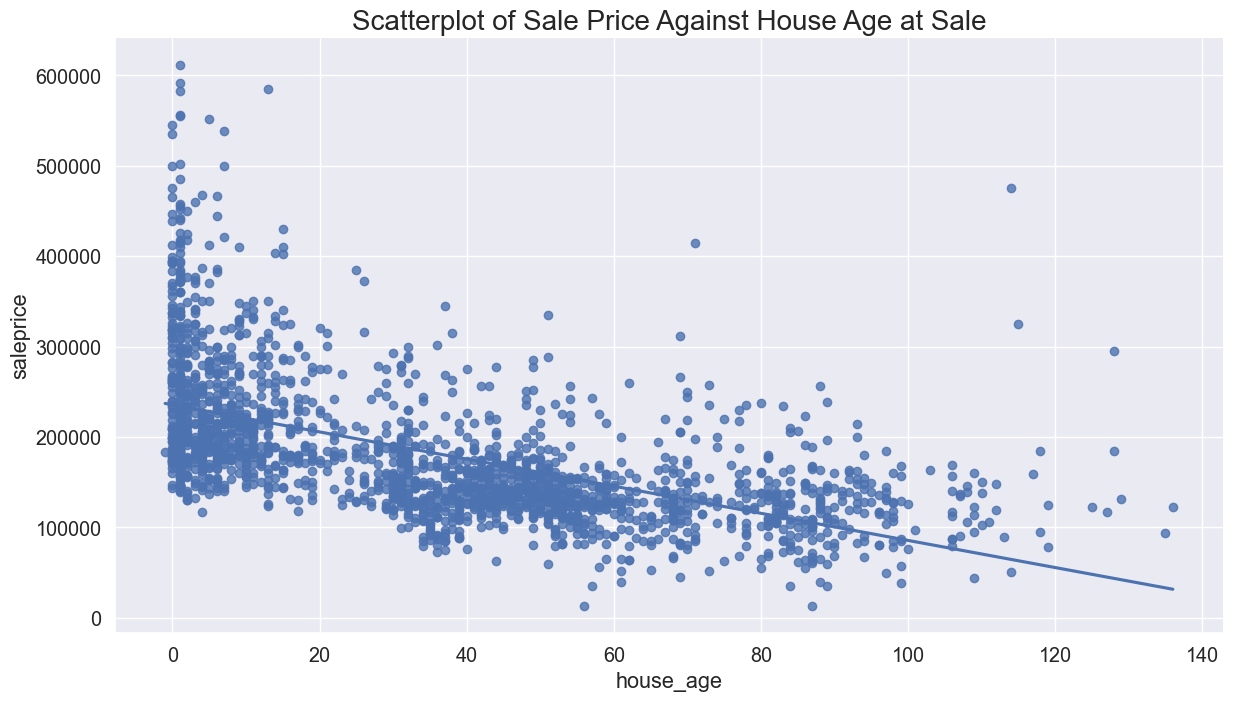

In [43]:
plot_scatterplot('house_age', 'Scatterplot of Sale Price Against House Age at Sale')

While the inverse correlation is only of moderate strength, the scatterplot reveals a downward trend where saleprice decreases as the age of a house increases.

## Feature Selection
A combination of both qualitative and quantitative considerations will be applied to pick out the final set of features that will go into building the model.

### Selection From Remaining Categorical Features. 
* **neighborhood** had a visible trend in saleprice across its categories. It is likely that some neighborhoods are more desirable than others and thus command a higher price. ms_zoning was a decent candidate as well, but deemed related to neighborhood hence not selected.
* **garage_type** had a visible trend in saleprice across its categories. The average car ownership in ames is 2 per household, making the garage an important factor in house valuation. source: [Data USA](https://datausa.io/profile/geo/ames-ia/) 

### Common Property Valuation Factors
In most conventional estimates of property prices, the total size of a lot typically plays a relatively important role in its valuation. The same holds true for the age of a house since this is related to how likely or how soon the house might need extra work. <br>
* **lot_area** and **house_age** will thus be included in the model as well.

### Ordinal and Numerical Variables
* **overall_qual**
* **gr_liv_area**
* **kitchen_qual**
* **garage_area**
* **total_bsmt_sf**
* **bsmt_qual**

In [44]:
train_feature = ames_housing[
    ['neighborhood', 
     'garage_type',  
     'lot_area', 
     'house_age', 
     'overall_qual',
     'gr_liv_area',
     'kitchen_qual',
     'garage_area',
     'total_bsmt_sf',
     'bsmt_qual',
     'saleprice']
    ]
train_feature.to_csv('datasets/train_cleaned_eda.csv', index=False)